In [1]:
import pyod
import sklearn
import matplotlib.pyplot as plt
from matplotlib.pyplot import scatter
import numpy as np

In [2]:
%%html
<h1>3.1 Ex. 1</h1>

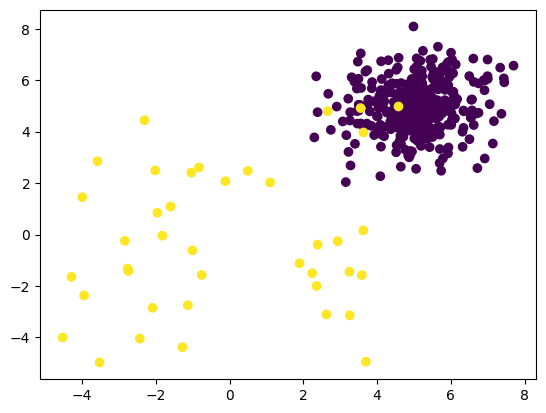

In [3]:
data = pyod.utils.data.generate_data(n_train=400, n_test=100, contamination=0.1, random_state=1)
X_train = data[0]
X_test = data[1]
y_train = data[2]
y_test = data[3]
color_map_train = [2 if label == 1 else 0 for label in y_train]

scatter(X_train[:, 0],
        X_train[:, 1],
        c = color_map_train)
plt.show()

In [4]:
%%html
<h1>3.2 Ex. 2</h1>

In [5]:
from pyod.models.knn import KNN

In [6]:
model = KNN(contamination=0.1)

In [7]:
y_pred_train = model.fit_predict(X_train, y_train)
y_pred_test = model.predict(X_test)

/Users/fflorete/Desktop/unibuc/AN 1 MASTER/AnomalyDetection/labs/.venv/lib/python3.13/site-packages/sklearn/utils/deprecation.py:95: FutureWarning: Function fit_predict is deprecated
  warnings.warn(msg, category=FutureWarning)
/Users/fflorete/Desktop/unibuc/AN 1 MASTER/AnomalyDetection/labs/.venv/lib/python3.13/site-packages/pyod/models/base.py:554: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(


In [8]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm_train = confusion_matrix(y_train, y_pred_train)
cm_test = confusion_matrix(y_test, y_pred_test)

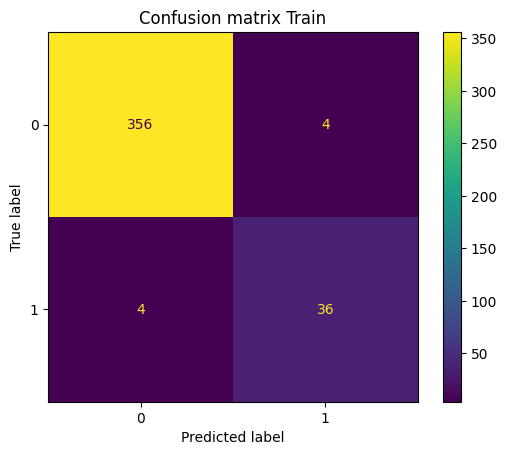

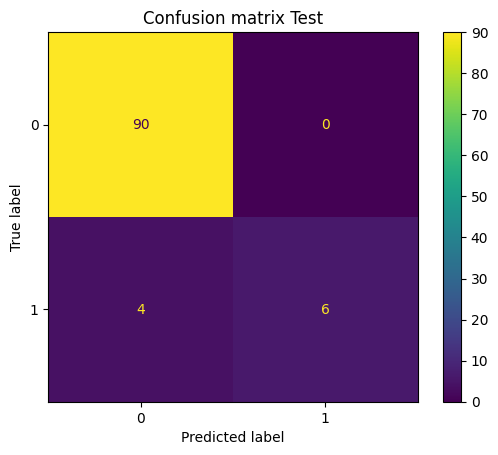


    True negatives train: 356
    True positives train: 36
    False negatives train: 4
    False positives train: 4

    True negatives test: 90
    True positives test: 6
    False negatives test: 4
    False positives test: 0

    Balanced accuracy train: 0.9444444444444444
    Balanced accuracy test: 0.8



In [9]:
ConfusionMatrixDisplay(cm_train).plot()
plt.title("Confusion matrix Train")
plt.show()
ConfusionMatrixDisplay(cm_test).plot()
plt.title("Confusion matrix Test")
plt.show()
TPR_train = (cm_train[1, 1]) / (cm_train[1, 1] + cm_train[1, 0])
TNR_train = (cm_train[0, 0]) / (cm_train[0, 0] + cm_train[0, 1])

TPR_test = (cm_test[1, 1]) / (cm_test[1, 1] + cm_test[1, 0])
TNR_test = (cm_test[0, 0]) / (cm_test[0, 0] + cm_test[0, 1])
print(f"""
    True negatives train: {cm_train[0, 0]}
    True positives train: {cm_train[1, 1]}
    False negatives train: {cm_train[1, 0]}
    False positives train: {cm_train[0, 1]}

    True negatives test: {cm_test[0, 0]}
    True positives test: {cm_test[1, 1]}
    False negatives test: {cm_test[1, 0]}
    False positives test: {cm_test[0, 1]}

    Balanced accuracy train: {(TPR_train + TNR_train) / 2}
    Balanced accuracy test: {(TPR_test + TNR_test) / 2}
""")

In [10]:
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import roc_curve

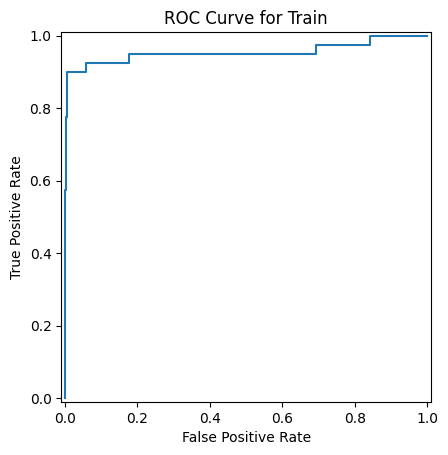

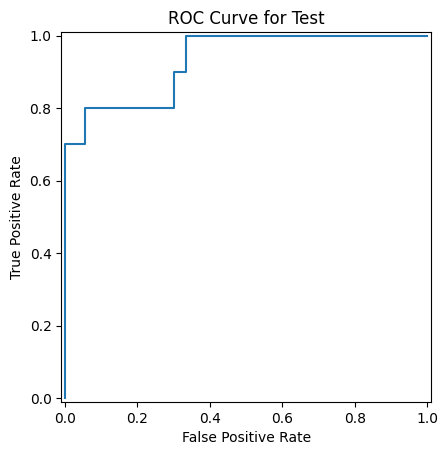

In [11]:
y_train_proba = model.decision_function(X_train)
y_test_proba = model.decision_function(X_test)

fpr, tpr, _ = sklearn.metrics.roc_curve(y_train, y_train_proba)
RocCurveDisplay(fpr=fpr, tpr=tpr).plot()
plt.title("ROC Curve for Train")
plt.show()

fpr, tpr, _ = sklearn.metrics.roc_curve(y_test, y_test_proba)
RocCurveDisplay(fpr=fpr, tpr=tpr).plot()
plt.title("ROC Curve for Test")
plt.show()

In [12]:
%%html
<h1>3.3 Ex. 3</h1>

In [13]:
data = pyod.utils.data.generate_data(n_train=1000, n_test=0, n_features=1, contamination=0.1)
X_train = data[0]
y_train = data[2]

In [14]:
from sklearn.base import BaseEstimator
class ZScoreDetector(BaseEstimator):
    contamination_rate: int
    mean: float
    std: float
    thr: float
    
    def __init__(self, contamination_rate=0.1):
        self.contamination_rate = contamination_rate

    def fit(self, X, y = None):
        self.mean = np.mean(X, axis = 0)
        self.std = np.std(X, axis = 0)
        Z_scores_X = np.abs(X - self.mean) / self.std
        self.thr = np.quantile(Z_scores_X, q=(1 - self.contamination_rate))

    def predict(self, X):
        Z_scores_X = np.abs(X - self.mean) / self.std
        return np.int32(Z_scores_X.max(axis=1) > self.thr)

    def fit_predict(self, X, y=None):
        self.fit(X, y)
        return self.predict(X)

In [15]:
detector = ZScoreDetector()
y_train_pred = detector.fit_predict(X_train)

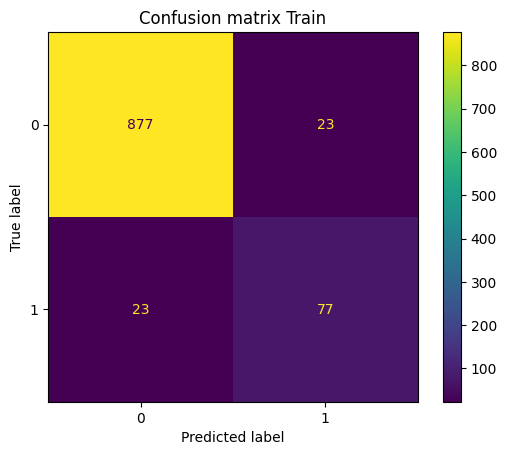


    True negatives train: 877
    True positives train: 77
    False negatives train: 23
    False positives train: 23

    Balanced accuracy train: 0.8722222222222222



In [16]:
cm_train = confusion_matrix(y_train, y_train_pred)
ConfusionMatrixDisplay(cm_train).plot()
plt.title("Confusion matrix Train")
plt.show()
TPR_train = (cm_train[1, 1]) / (cm_train[1, 1] + cm_train[1, 0])
TNR_train = (cm_train[0, 0]) / (cm_train[0, 0] + cm_train[0, 1])
print(f"""
    True negatives train: {cm_train[0, 0]}
    True positives train: {cm_train[1, 1]}
    False negatives train: {cm_train[1, 0]}
    False positives train: {cm_train[0, 1]}

    Balanced accuracy train: {(TPR_train + TNR_train) / 2}
""")

In [17]:
%%html
<h1>3.4 Ex. 4</h1>

In [18]:
class DatasetGenerator():
    mean_vector: np.array
    covariance_matrix: np.array
    dim: int
    contamination_rate: float

    def __init__(self, mean_vector, covariance_matrix, dim, contamination_rate = 0.1):
        self.mean_vector = mean_vector
        self.covariance_matrix = covariance_matrix
        self.dim = dim
        self.L = np.linalg.cholesky(self.covariance_matrix)
        self.contamination_rate = contamination_rate

    def get_sample(self):
        x = np.random.normal(size=self.dim)
        return self.mean_vector + self.L @ x

    def get_outlier(self):
        x = np.random.uniform(low = -1 * self.mean_vector, high=self.mean_vector,
                              size = self.dim)
        return x

    def get_n_samples(self, n_samples):
        n_contaminated = int(self.contamination_rate * n_samples)
        clean_samples = []
        contaminated_samples = []
        labels = []
        for _ in range(n_samples - n_contaminated):
            clean_samples.append(self.get_sample())
            labels.append(0)
        for _ in range(n_contaminated):
            contaminated_samples.append(self.get_outlier())
            labels.append(1)
        all_samples = clean_samples + contaminated_samples
        return np.array(clean_samples), np.array(contaminated_samples), np.array(all_samples), np.array(labels)

In [19]:
def get_parameters(dim):
    mean_vector = np.random.uniform(low=-5, high=5, size=dim)
    covariance_matrix = np.random.rand(dim, dim)
    covariance_matrix = covariance_matrix @ covariance_matrix.T
    return mean_vector, covariance_matrix

In [20]:
dim = 7
mean_vector, covariance_matrix = get_parameters(dim)
gen = DatasetGenerator(mean_vector=mean_vector, covariance_matrix=covariance_matrix, contamination_rate=0.1, dim = dim)

clean_samples, contaminated_samples, all_samples, labels = gen.get_n_samples(1000)

In [21]:
X_train = all_samples
y_train = labels
detector = ZScoreDetector()
y_train_pred = detector.fit_predict(X_train, y_train)

In [22]:
print(X_train.shape)

(1000, 7)


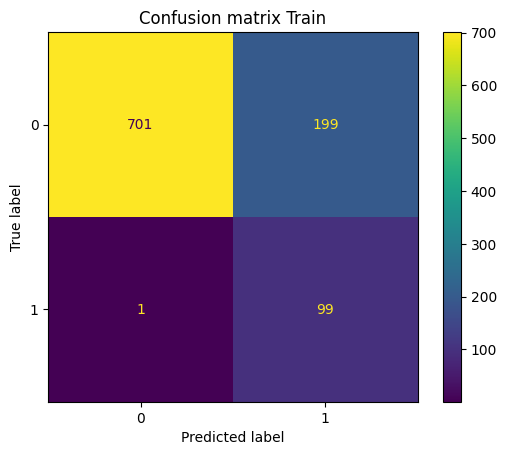


    True negatives train: 701
    True positives train: 99
    False negatives train: 1
    False positives train: 199

    Balanced accuracy train: 0.8844444444444444



In [23]:
cm_train = confusion_matrix(y_train, y_train_pred)
ConfusionMatrixDisplay(cm_train).plot()
plt.title("Confusion matrix Train")
plt.show()
TPR_train = (cm_train[1, 1]) / (cm_train[1, 1] + cm_train[1, 0])
TNR_train = (cm_train[0, 0]) / (cm_train[0, 0] + cm_train[0, 1])
print(f"""
    True negatives train: {cm_train[0, 0]}
    True positives train: {cm_train[1, 1]}
    False negatives train: {cm_train[1, 0]}
    False positives train: {cm_train[0, 1]}

    Balanced accuracy train: {(TPR_train + TNR_train) / 2}
""")